In [2]:
!pip install pip
!pip install tensorflow
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\theboss\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\theboss\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\theboss\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\theboss\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt

input_width = 1500
input_height = 1500
number_of_slices = 200
inputsize = input_width * input_height * number_of_slices


objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

training_images  = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


model.fit(training_images, training_labels, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.9142
Epoch 2/10
1147/1875 [=================>............] - ETA: 1s - loss: 0.1507 - accuracy: 0.9557

KeyboardInterrupt: 

313/313 [==============================] - 0s 1ms/step
7


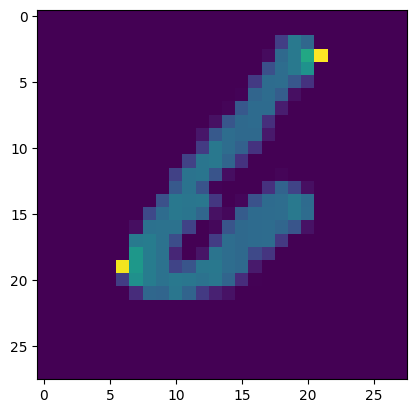

In [48]:
#print(model.evaluate(test_images, test_labels))

testImage = 9665
plt.imshow(test_images[testImage])

#testResults = model.predict(test_images)
#refTestResults = [0]
#for i in range(len(testResults)):
#    refTestResults.append(np.argmax(testResults[i]))

#print(np.argmax(refTestResults[testImage]))


prediction=model.predict(test_images)
print(np.argmax(prediction[0]))
